In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 1. Loading Data
train_data = pd.read_csv('https://raw.githubusercontent.com/annmary17/Deep_Learning/main/Google_Stock_Price_Train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/annmary17/Deep_Learning/main/Google_Stock_Price_Test.csv')


In [ ]:
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
# 2. Splitting Data as Train and Validation
length_data = len(train_data)
split_ratio = 0.7
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train

print("Data length:", length_data)
print("Train data length:", length_train)
print("Validation data length:", length_validation)

Data length: 1258
Train data length: 881
Validation data length: 377


In [ ]:
train_data_split = train_data[:length_train].iloc[:, :2]
train_data_split['Date'] = pd.to_datetime(train_data_split['Date'])
train_data_split

,Date,Open
0,2012-01-03,325.25
1,2012-01-04,331.27
2,2012-01-05,329.83
3,2012-01-06,328.34
4,2012-01-09,322.04
...,...,...
876,2015-06-29,525.01
877,2015-06-30,526.02
878,2015-07-01,524.73
879,2015-07-02,521.08


In [ ]:
validation_data_split = train_data[length_train:].iloc[:, :2]
validation_data_split['Date'] = pd.to_datetime(validation_data_split['Date'])
validation_data_split

,Date,Open
881,2015-07-07,523.13
882,2015-07-08,521.05
883,2015-07-09,523.12
884,2015-07-10,526.29
885,2015-07-13,532.88
...,...,...
1253,2016-12-23,790.90
1254,2016-12-27,790.68
1255,2016-12-28,793.70
1256,2016-12-29,783.33


In [ ]:
# 3. Creating Train Dataset from Train Split
dataset_train = train_data_split.Open.values
dataset_train = np.reshape(dataset_train, (-1, 1))
dataset_train.shape

(881, 1)

In [ ]:
# 4. Normalization / Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

dataset_train_scaled = scaler.fit_transform(dataset_train)
dataset_train_scaled.shape

(881, 1)

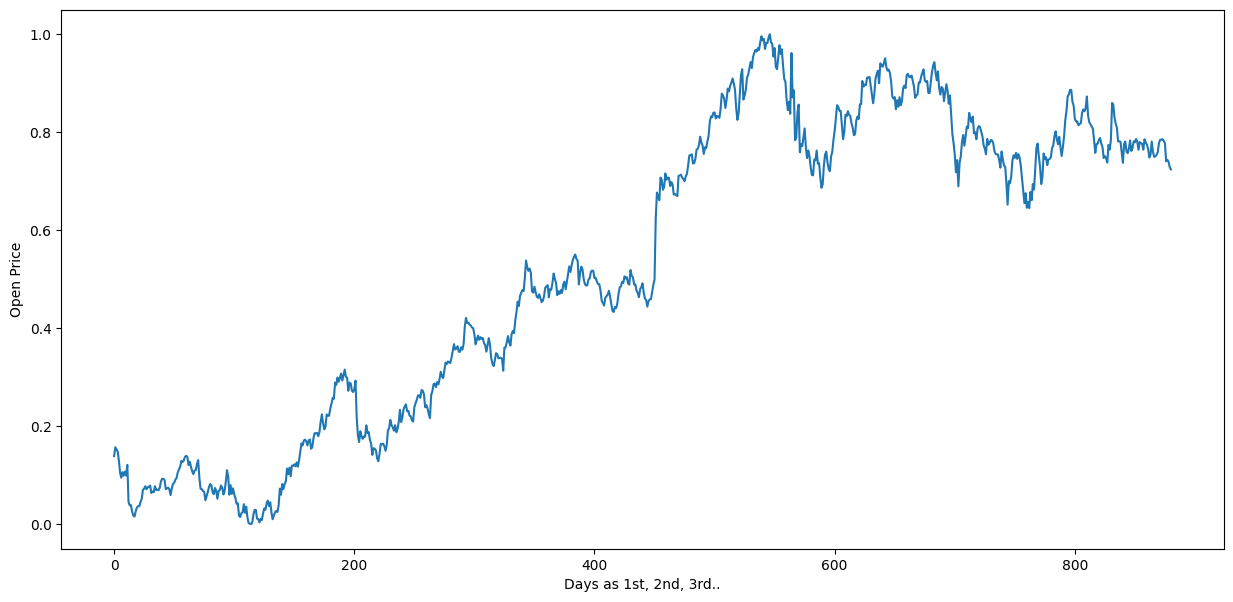

In [ ]:
plt.subplots(figsize=(15, 7))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [ ]:
# 5. Creating X_train and y_train from Train data
X_train, y_train = [], []
time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i, 0])
    y_train.append(dataset_train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print("Shape of X_train before reshape:", X_train.shape)
print("Shape of y_train before reshape:", y_train.shape)

Shape of X_train: (831, 50)
Shape of y_train: (831,)


In [ ]:
# Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (-1, 1))

print("Shape of X_train after reshape:", X_train.shape)
print("Shape of y_train after reshape:", y_train.shape)

Shape of X_train after reshape: (831, 50, 1)
Shape of y_train after reshape: (831, 1)


In [ ]:
print(" X_train[0]:", X_train[0])  # Display first input sequence

 X_train[0]: [[0.13894997]
 [0.15708304]
 [0.15274556]
 [0.14825748]
 [0.129281  ]
 [0.10415976]
 [0.09479201]
 [0.10635863]
 [0.09891864]
 [0.10750324]
 [0.09946083]
 [0.12102774]
 [0.04530257]
 [0.03852526]
 [0.0390072 ]
 [0.02578391]
 [0.01747041]
 [0.01566312]
 [0.02659719]
 [0.03400705]
 [0.03692882]
 [0.03680834]
 [0.04551342]
 [0.05201964]
 [0.07024308]
 [0.07247206]
 [0.07756258]
 [0.07135757]
 [0.07527335]
 [0.07683966]
 [0.07891804]
 [0.06373686]
 [0.06698997]
 [0.06533329]
 [0.07747221]
 [0.07003223]
 [0.07054429]
 [0.06939968]
 [0.07452032]
 [0.08741227]
 [0.09292449]
 [0.09253291]
 [0.09018344]
 [0.07159854]
 [0.07310461]
 [0.07458056]
 [0.07144794]
 [0.05951987]
 [0.07265279]
 [0.08202054]]


In [ ]:
print(" y_train[0]:", y_train[0])  # Display first target value

 y_train[0]: [0.08443025]


In [ ]:
# 6. Creating RNN Model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

regressor = Sequential()
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

regressor.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

history = regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.0034 - loss: 0.5246
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.0061 - loss: 0.2622
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.0013 - loss: 0.1866
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0011 - loss: 0.1735
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 5.2479e-04 - loss: 0.1406
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.0039 - loss: 0.1154
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.0021 - loss: 0.0903
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.0021 - loss: 0.0848
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 5.3501e-04 - loss: 0.0735
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 5.3501e-04 - loss: 0.0688
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 8.7781e-04 - loss: 0.0607
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms

In [ ]:
# 7. Evaluating Model
# Losses
history.history["loss"]

[0.4095035195350647,
 0.2553628981113434,
 0.19383002817630768,
 0.17453666031360626,
 0.1300424188375473,
 0.1079631820321083,
 0.08800527453422546,
 0.0801887959241867,
 0.0722464844584465,
 0.068894162774086,
 0.059285957366228104,
 0.0532260537147522,
 0.046897970139980316,
 0.04462840408086777,
 0.038262080401182175,
 0.03525127097964287,
 0.033928416669368744,
 0.030412904918193817,
 0.030546102672815323,
 0.029463229700922966,
 0.02531334012746811,
 0.021145248785614967,
 0.02255002036690712,
 0.019073447212576866,
 0.01878388412296772,
 0.01913171447813511,
 0.01566315069794655,
 0.01728750579059124,
 0.017296383157372475,
 0.015094396658241749,
 0.013304250314831734,
 0.014162883162498474,
 0.012138026766479015,
 0.013062861748039722,
 0.012302644550800323,
 0.012435450218617916,
 0.011352346278727055,
 0.010342586785554886,
 0.01046228501945734,
 0.010209632106125355,
 0.008940747007727623,
 0.009118042886257172,
 0.008211162872612476,
 0.008823114447295666,
 0.00855317339301

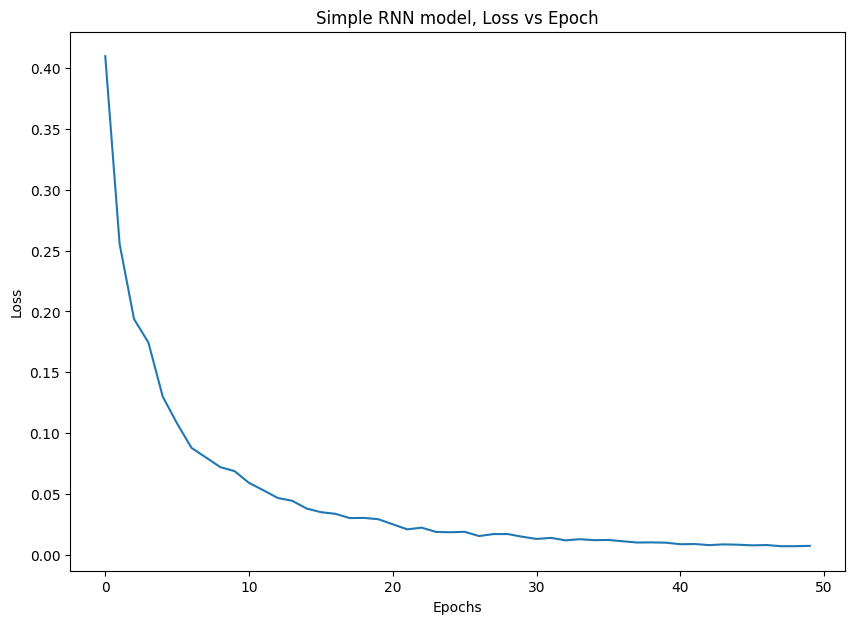

In [ ]:
# Plotting Loss vs Epochs
plt.figure(figsize=(10, 7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

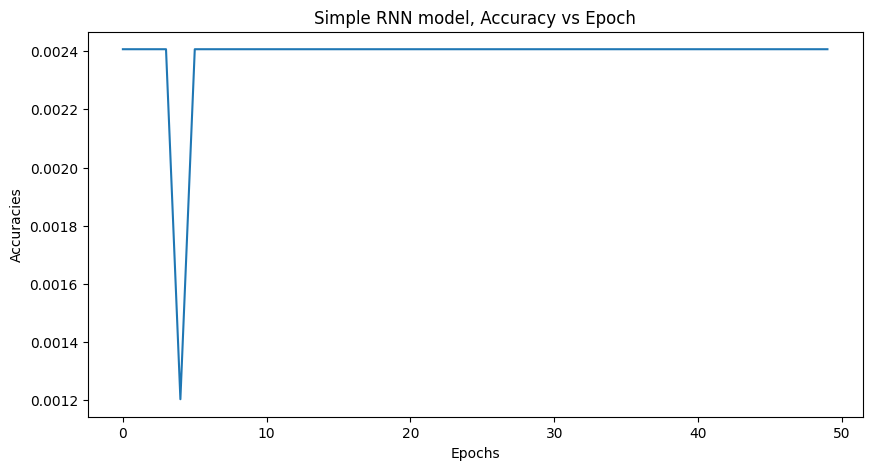

In [ ]:
# Plotting Accuracy vs Epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [ ]:
# 8. Creating Test Dataset from Validation Data

# Extracting 'Open' values from validation data and scaling
dataset_validation = validation_data_split.Open.values  # Select 'Open' prices
dataset_validation = np.reshape(dataset_validation, (-1, 1))  # Reshape to 2D for scaling
scaled_dataset_validation = scaler.fit_transform(dataset_validation)  # Scale to 0-1 range

# Creating input sequences (X_test) and target values (y_test) for test data
X_test, y_test = [], []
for i in range(time_step, len(scaled_dataset_validation)):
    X_test.append(scaled_dataset_validation[i-time_step:i, 0])  # Sequence of past 'time_step' days
    y_test.append(scaled_dataset_validation[i, 0])  # Target: the next day's 'Open' price

# Convert lists to numpy arrays and reshape for model compatibility
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape to (samples, time_step, features)
y_test = np.reshape(y_test, (-1, 1))  # Reshape to (samples, 1)

# Display shapes and sample data
print(f"Shape of X_test: {X_test.shape}")  # Shape: (samples, time_step, 1)
print(f"Shape of y_test: {y_test.shape}")  # Shape: (samples, 1)

Shape of X_test: (327, 50, 1)
Shape of y_test: (327, 1)
 X_test[0]: [[0.00703582]
 [0.        ]
 [0.007002  ]
 [0.01772486]
 [0.04001624]
 [0.08696682]
 [0.13219227]
 [0.14907147]
 [0.43280452]
 [0.46744241]
 [0.45381051]
 [0.47302371]
 [0.4743091 ]
 [0.42603931]
 [0.33809153]
 [0.37810777]
 [0.36447587]
 [0.36853499]
 [0.37320299]
 [0.35277205]
 [0.36319047]
 [0.38318168]
 [0.41927409]
 [0.40313906]
 [0.4006021 ]
 [0.50113317]
 [0.48043162]
 [0.46771302]
 [0.45313399]
 [0.45918885]
 [0.47644014]
 [0.45851233]
 [0.45465616]
 [0.40161689]
 [0.17572641]
 [0.31749146]
 [0.30206677]
 [0.4003315 ]
 [0.37807394]
 [0.36021378]
 [0.27503975]
 [0.28596557]
 [0.32456111]
 [0.26705679]
 [0.30930555]
 [0.33883571]
 [0.31136894]
 [0.33386328]
 [0.35398978]
 [0.35737239]]
 y_test[0]: [0.38703785]


In [ ]:
print(" X_test[0]:", X_test[0])  # First input sequence

 X_test[0]: [[0.00703582]
 [0.        ]
 [0.007002  ]
 [0.01772486]
 [0.04001624]
 [0.08696682]
 [0.13219227]
 [0.14907147]
 [0.43280452]
 [0.46744241]
 [0.45381051]
 [0.47302371]
 [0.4743091 ]
 [0.42603931]
 [0.33809153]
 [0.37810777]
 [0.36447587]
 [0.36853499]
 [0.37320299]
 [0.35277205]
 [0.36319047]
 [0.38318168]
 [0.41927409]
 [0.40313906]
 [0.4006021 ]
 [0.50113317]
 [0.48043162]
 [0.46771302]
 [0.45313399]
 [0.45918885]
 [0.47644014]
 [0.45851233]
 [0.45465616]
 [0.40161689]
 [0.17572641]
 [0.31749146]
 [0.30206677]
 [0.4003315 ]
 [0.37807394]
 [0.36021378]
 [0.27503975]
 [0.28596557]
 [0.32456111]
 [0.26705679]
 [0.30930555]
 [0.33883571]
 [0.31136894]
 [0.33386328]
 [0.35398978]
 [0.35737239]]


In [ ]:
print(" y_test[0]:", y_test[0])  # First target value

 y_test[0]: [0.38703785]


In [ ]:
# 9. Predictions with RNN
y_pred_of_test = regressor.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Shape of y_pred_of_test : (327, 1)


In [ ]:
y_test_actual = scaler.inverse_transform(y_test)
y_test_actual.shape


(327, 1)

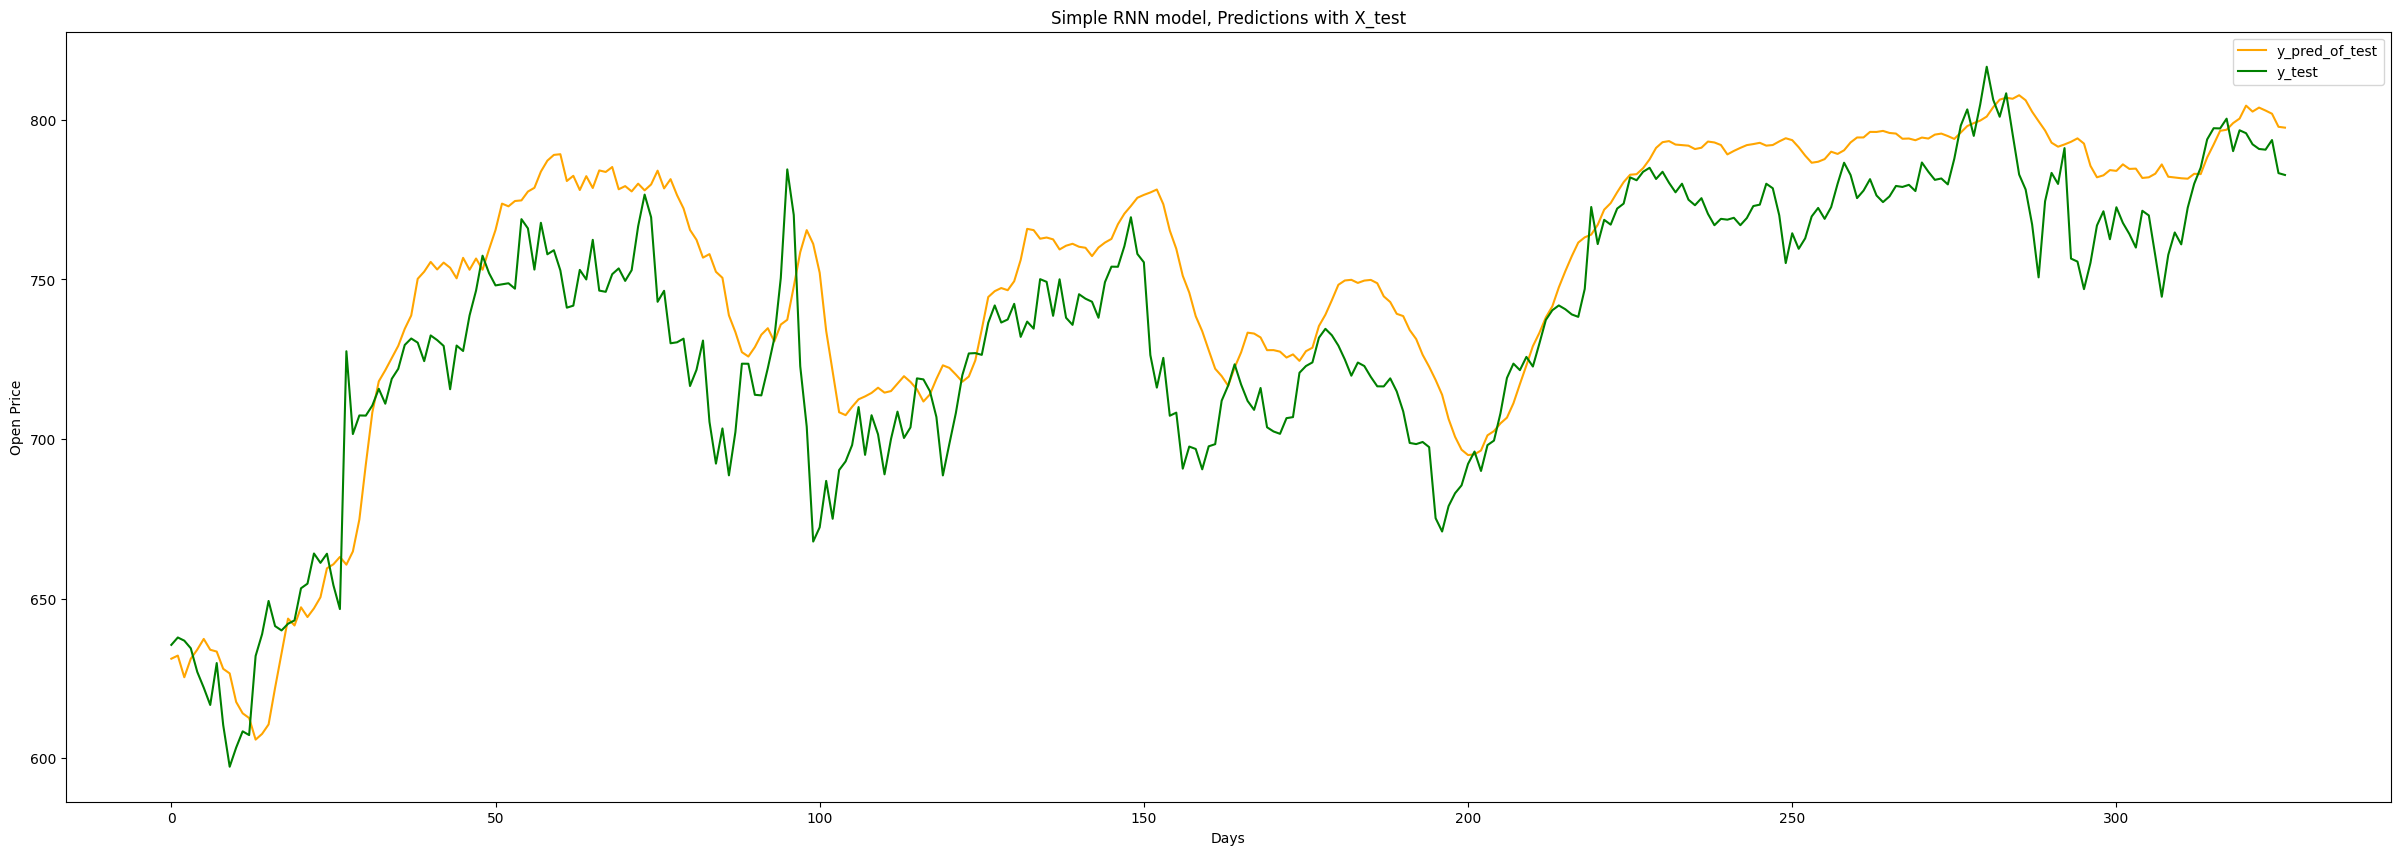

In [ ]:
# Visualisation
plt.figure(figsize=(30, 10))
plt.plot(y_pred_of_test, label="y_pred_of_test", color="orange")
plt.plot(y_test_actual, label="y_test", color="green")
plt.xlabel("Days")
plt.ylabel("Open Price")
plt.title("Simple RNN model, Predictions with X_test")
plt.legend()
plt.show()

In [ ]:
# 10. Creating LSTM Model
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs=10, batch_size=12)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.0026 - loss: 0.0824
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.0030 - loss: 0.0020
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.0033 - loss: 0.0016
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.0014 - loss: 0.0016
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.0045 - loss: 0.0015
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.0011 - loss: 0.0014
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.0050 - loss: 0.0013
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.0047 - loss: 0.0014
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.0026 - loss: 0.0013
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.0049 - loss: 0.0013


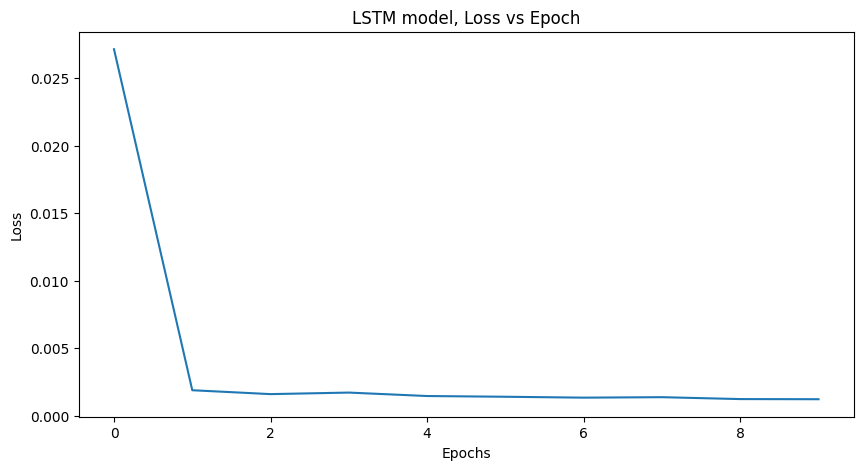

In [ ]:
# 11. Evaluating LSTM Model

# Visualizing LSTM Model Training Loss
plt.figure(figsize=(10, 5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM model, Loss vs Epoch")
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


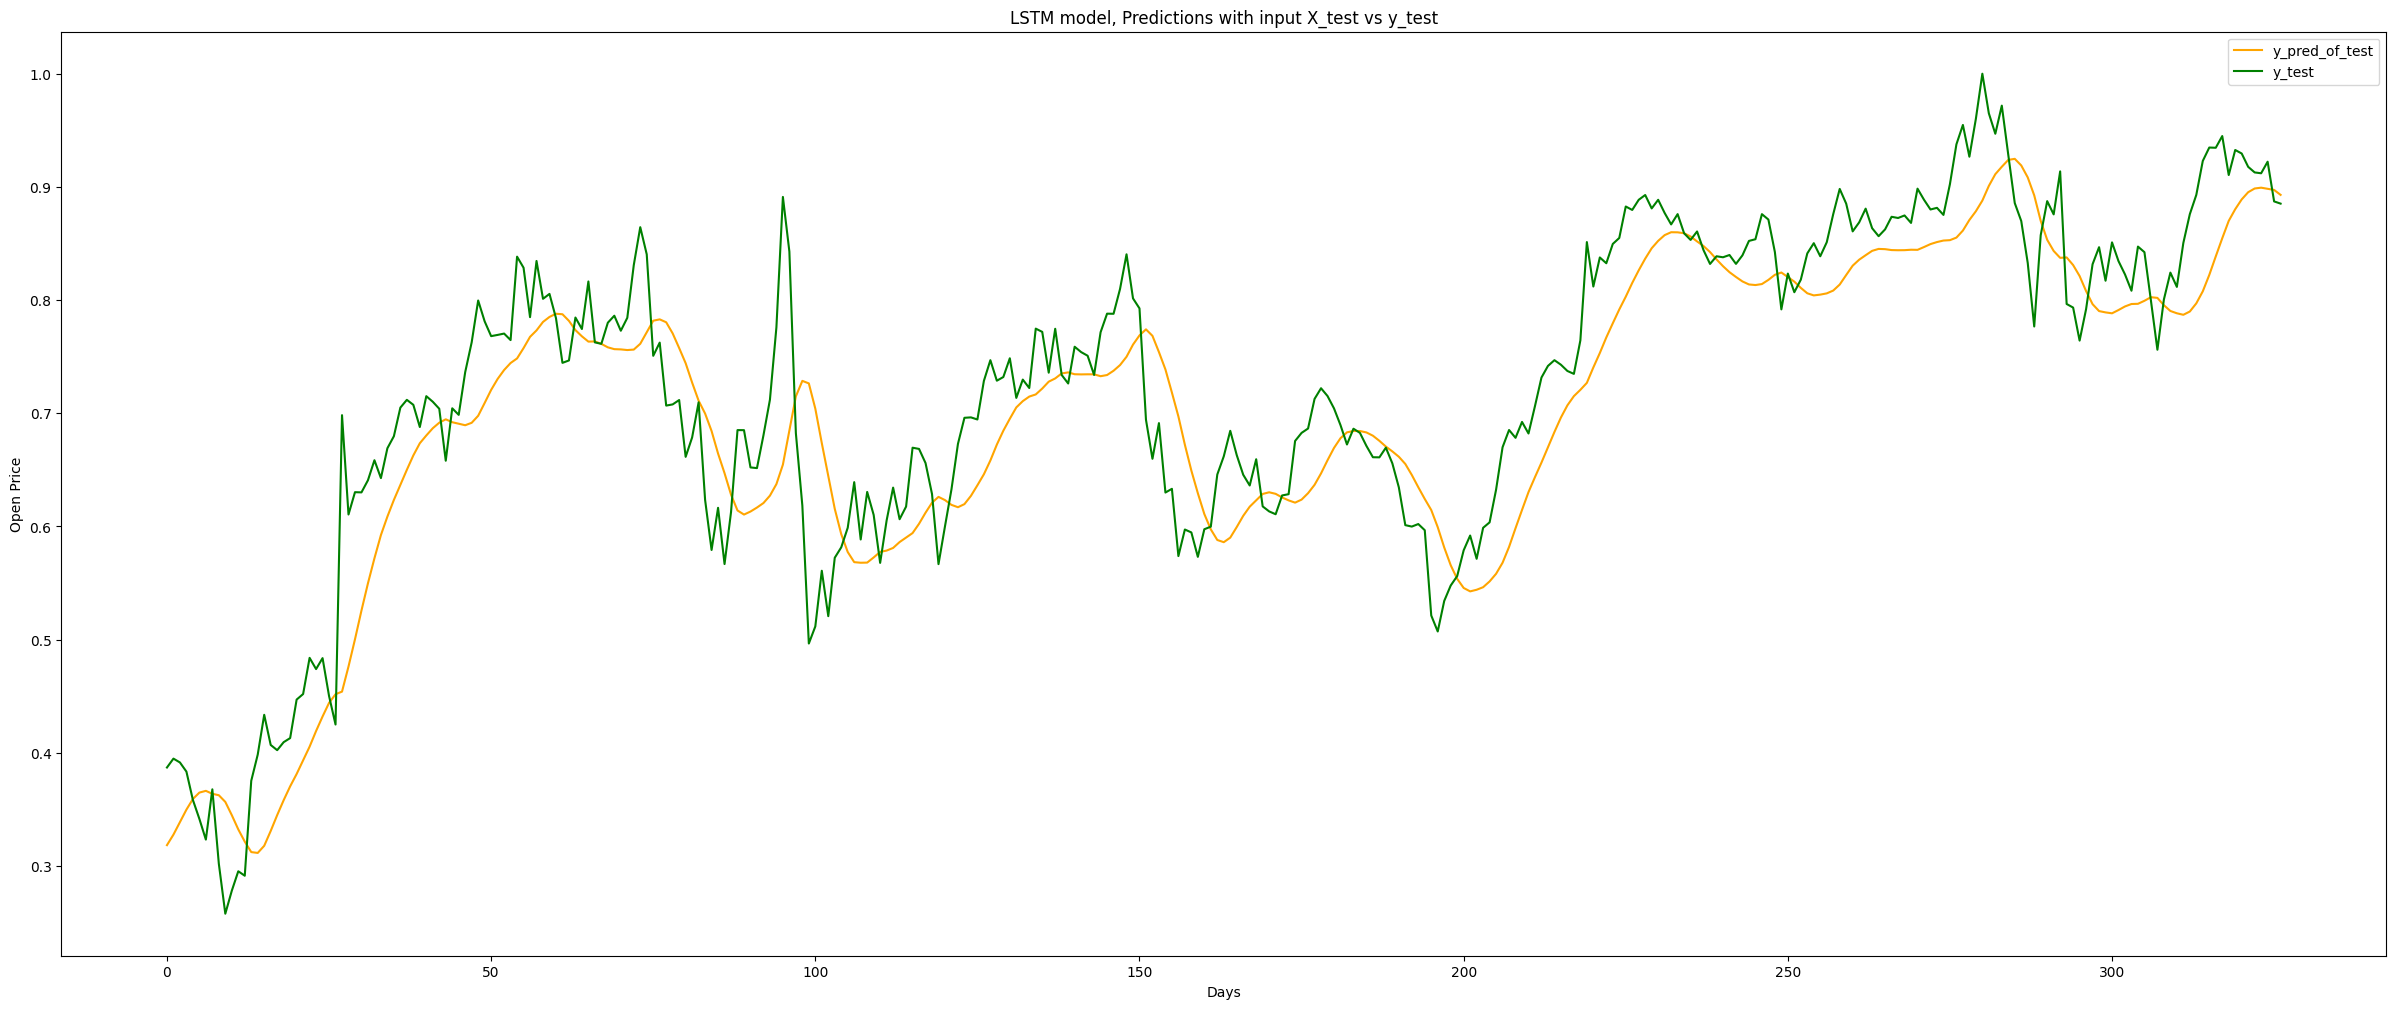

In [ ]:
# Visualizing LSTM Model Predictions vs Actual Test Data
y_pred_of_test = model_lstm.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)  # Convert predictions back to original scale
y_test_actual = scaler.inverse_transform(y_test)  # Convert actual values back to original scale

plt.subplots(figsize=(30, 12))
plt.plot(y_pred_of_test, label="y_pred_of_test", c="orange")  # Predicted values
plt.plot(y_test_actual, label="y_test", color="green")  # Actual values
plt.xlabel("Days")
plt.ylabel("Open Price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
# 12. Creating GRU Model
from keras.layers import GRU

model_gru = Sequential()
model_gru.add(GRU(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_gru.add(GRU(64, return_sequences=False))
model_gru.add(Dense(32))
model_gru.add(Dense(1))
model_gru.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

# Scaling y_train
y_train_scaled = scaler.fit_transform(y_train)

# Training GRU Model
history_gru = model_gru.fit(X_train, y_train_scaled, epochs=10, batch_size=12)


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.0035 - loss: 0.0796
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 6.0212e-04 - loss: 8.3682e-04
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.0015 - loss: 7.1408e-04
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.0048 - loss: 6.3516e-04
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.0028 - loss: 6.1247e-04
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.0013 - loss: 6.9345e-04
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.0021 - loss: 5.4582e-04
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.0010 - loss: 5.6662e-04    
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.0025 - loss: 5.1899e-04
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.0022 - loss: 4.8021e-04


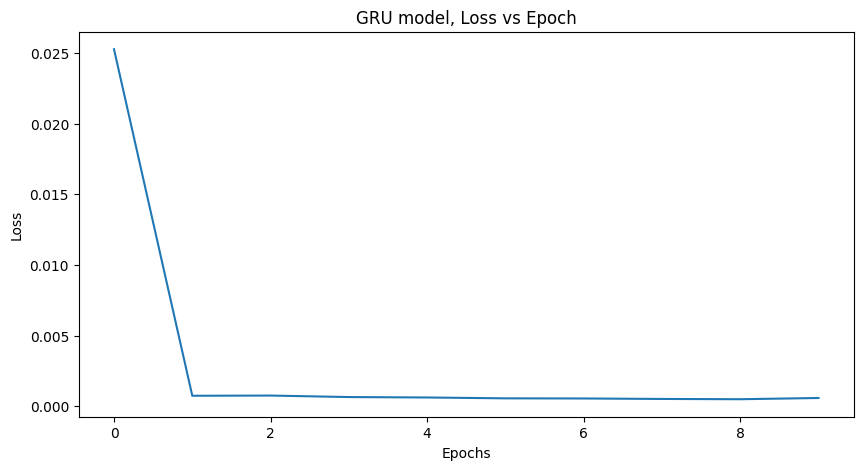

In [ ]:
# 13. Evaluating GRU Model

# Visualizing GRU Model Training Loss
plt.figure(figsize=(10, 5))
plt.plot(history_gru.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("GRU model, Loss vs Epoch")
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


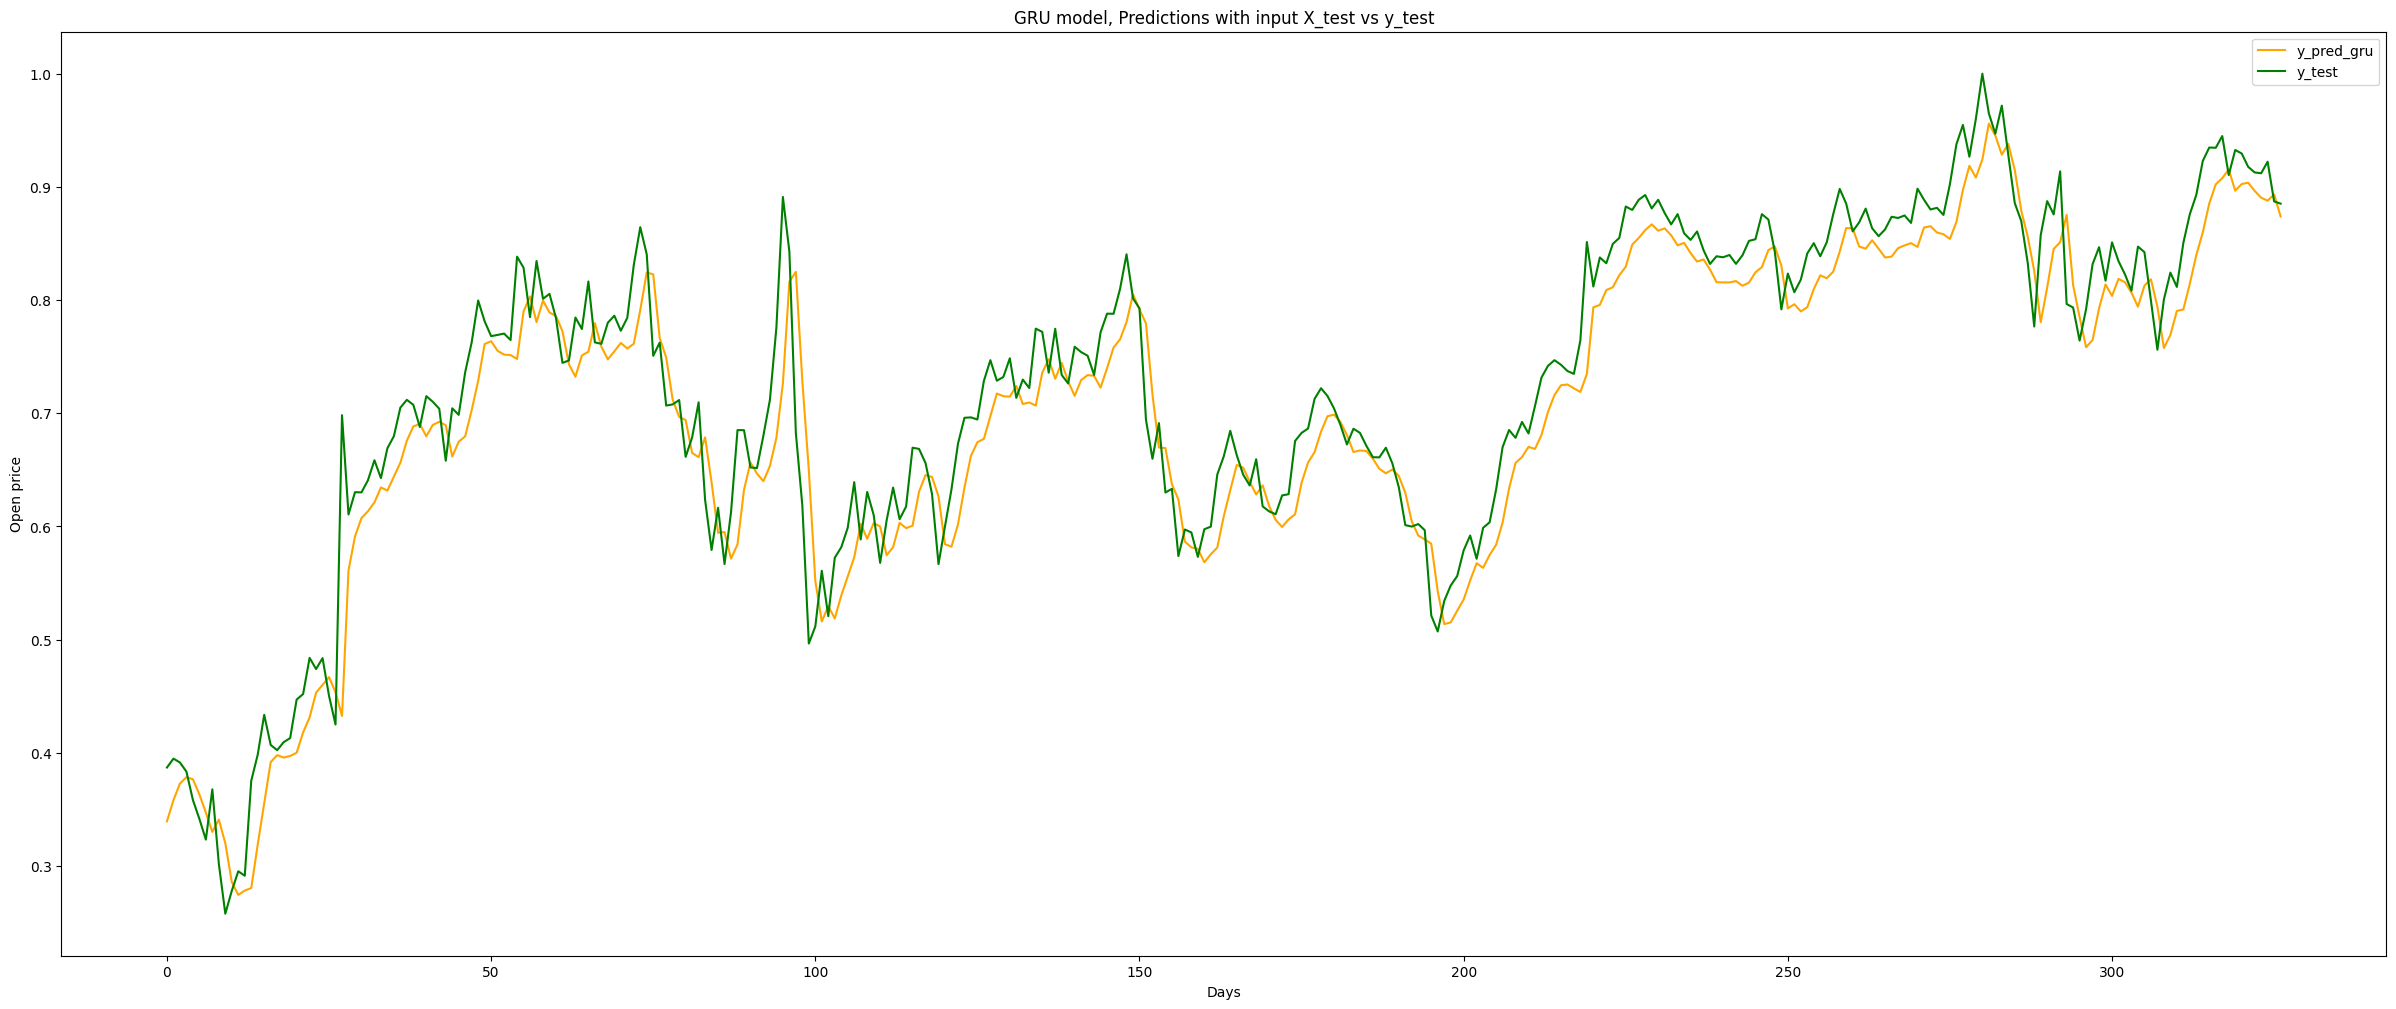

In [ ]:
# Predictions with GRU Model on Test Data
y_pred_gru = model_gru.predict(X_test)
y_pred_gru = scaler.inverse_transform(y_pred_gru)  # Convert predictions back to original scale
y_test_actual = scaler.inverse_transform(y_test)  # Convert actual values back to original scale

# Visualizing GRU Model Predictions vs Actual
plt.subplots(figsize=(30, 12))
plt.plot(y_pred_gru, label="y_pred_gru", c="orange")  # Predicted values
plt.plot(y_test_actual, label="y_test", color="green")  # Actual values
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("GRU model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()



11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


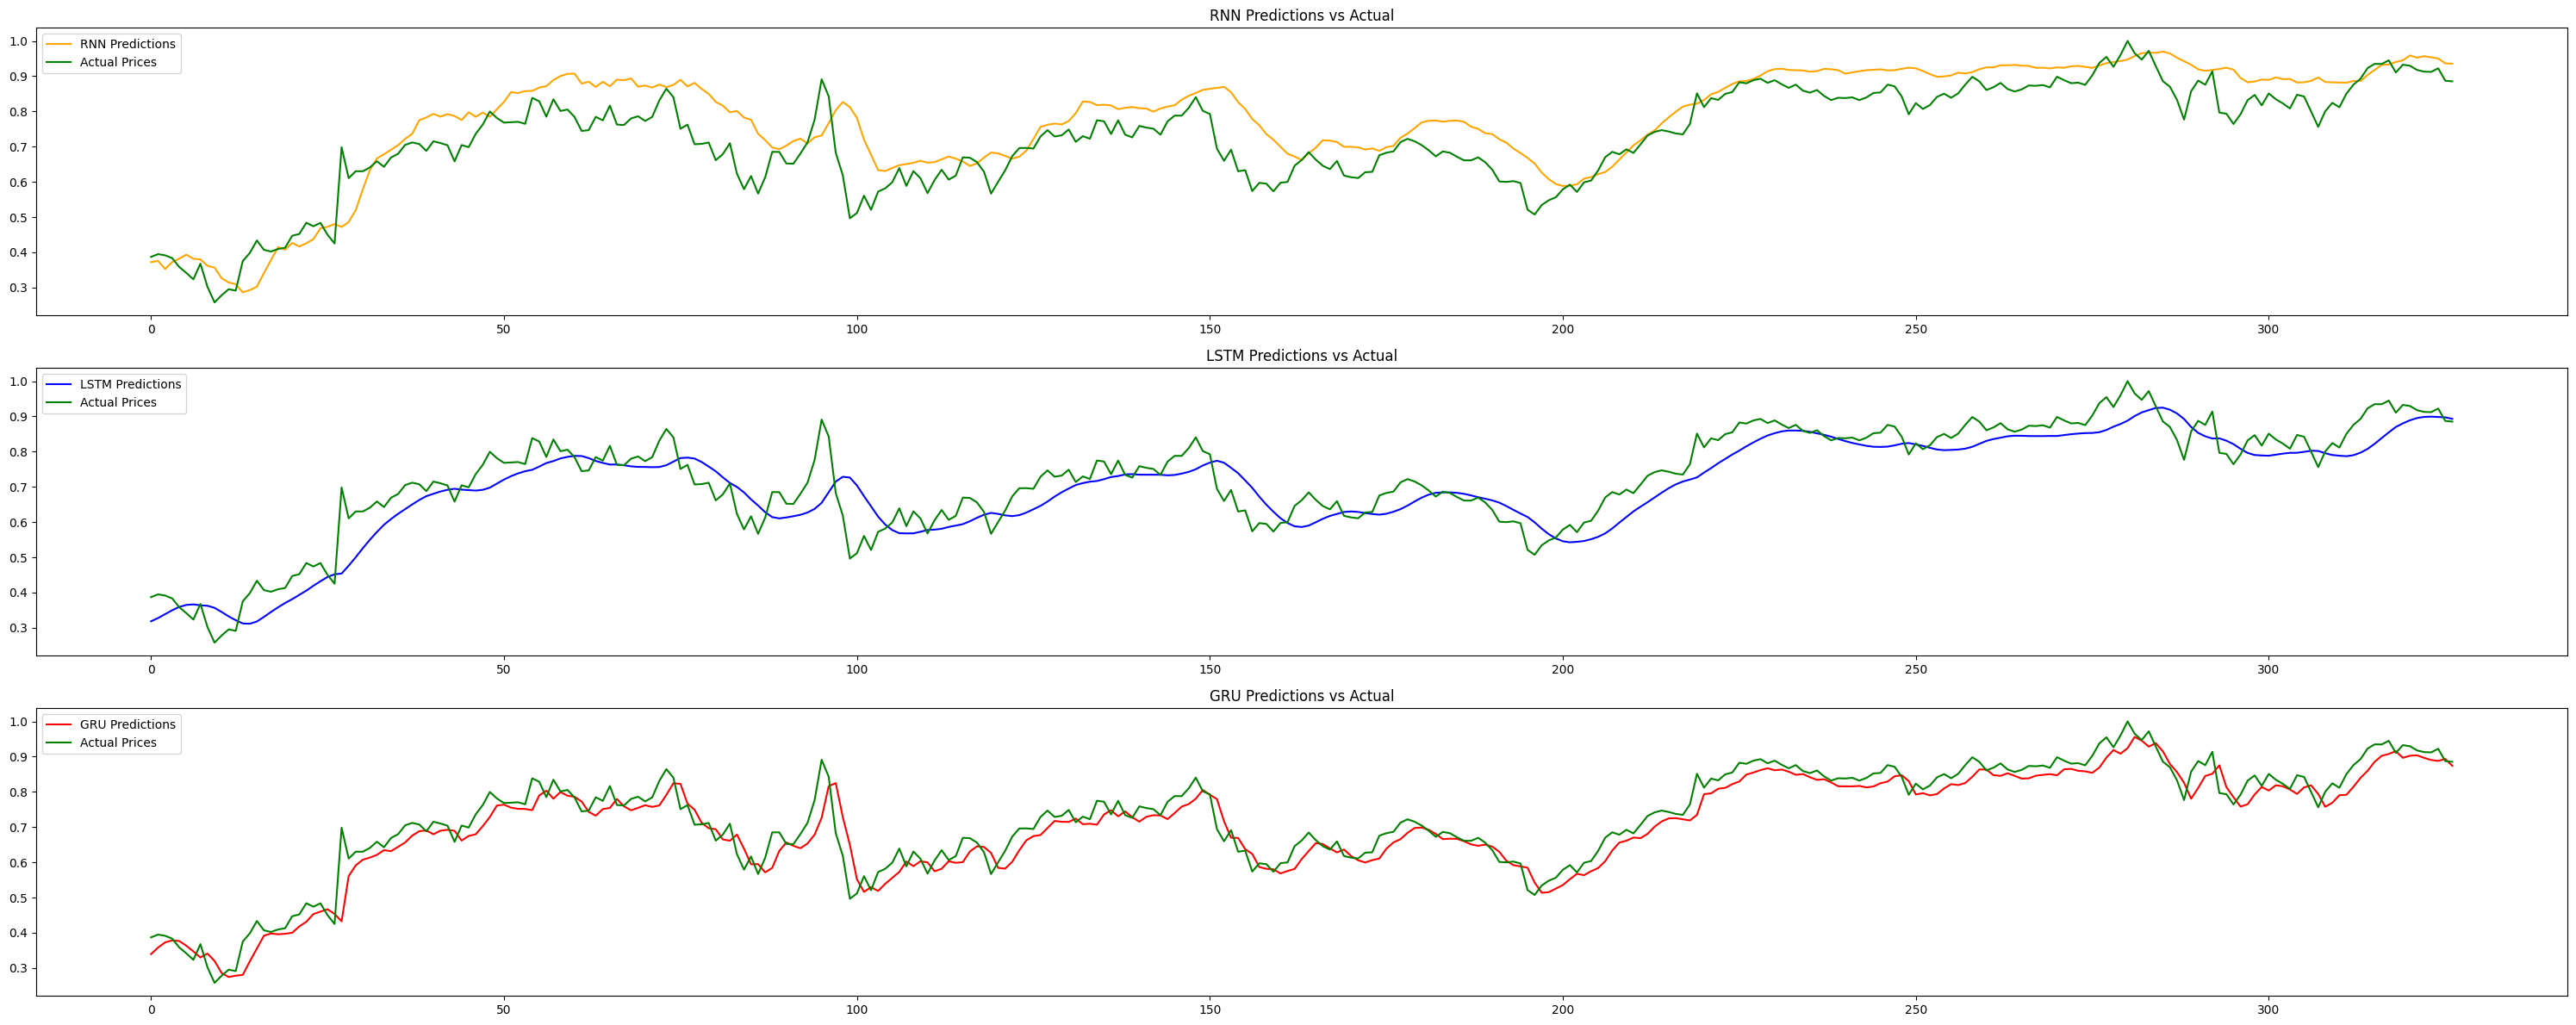

In [ ]:
# 14. Comparing Predictions from RNN, LSTM, and GRU Models

# Generate predictions for test data using all three models
y_pred_rnn = regressor.predict(X_test)  # RNN predictions
y_pred_lstm = model_lstm.predict(X_test)  # LSTM predictions
y_pred_gru = model_gru.predict(X_test)  # GRU predictions

# Convert predictions back to original scale for meaningful comparison
y_pred_rnn_actual = scaler.inverse_transform(y_pred_rnn)  # RNN predictions in original scale
y_pred_lstm_actual = scaler.inverse_transform(y_pred_lstm)  # LSTM predictions in original scale
y_pred_gru_actual = scaler.inverse_transform(y_pred_gru)  # GRU predictions in original scale

# Visualizing predictions from all three models vs actual values
plt.figure(figsize=(30, 12))

# RNN Plot
plt.subplot(3, 1, 1)
plt.plot(y_pred_rnn_actual, label="RNN Predictions", color="orange")  # RNN predictions
plt.plot(y_test_actual, label="Actual Prices", color="green")  # Actual prices
plt.title("RNN Predictions vs Actual")
plt.legend()

# LSTM Plot
plt.subplot(3, 1, 2)
plt.plot(y_pred_lstm_actual, label="LSTM Predictions", color="blue")  # LSTM predictions
plt.plot(y_test_actual, label="Actual Prices", color="green")  # Actual prices
plt.title("LSTM Predictions vs Actual")
plt.legend()

# GRU Plot
plt.subplot(3, 1, 3)
plt.plot(y_pred_gru_actual, label="GRU Predictions", color="red")  # GRU predictions
plt.plot(y_test_actual, label="Actual Prices", color="green")  # Actual prices
plt.title("GRU Predictions vs Actual")
plt.legend()

# Adjust layout to avoid overlapping titles and labels
plt.tight_layout()
plt.show()
